In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm

In [2]:
all_weeks_global=pd.read_excel('all-weeks-global.xlsx')
all_weeks_global.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2023-11-19,Films (English),1,The Killer,NaN,44500000,2.0000,22300000.0,2,False,NaN
1,2023-11-19,Films (English),2,Best. Christmas. Ever!,NaN,22300000,1.3667,16300000.0,1,False,NaN
2,2023-11-19,Films (English),3,Monster Hunter,NaN,10500000,1.7167,6100000.0,1,False,NaN
3,2023-11-19,Films (English),4,Locked In,NaN,8200000,1.6167,5100000.0,3,False,NaN
4,2023-11-19,Films (English),5,F9: The Fast Saga,NaN,10200000,2.3833,4300000.0,4,False,NaN


In [3]:
df=all_weeks_global[['week','category','show_title','weekly_hours_viewed']].copy()
df

,week,category,show_title,weekly_hours_viewed
0,2023-11-19,Films (English),The Killer,44500000
1,2023-11-19,Films (English),Best. Christmas. Ever!,22300000
2,2023-11-19,Films (English),Monster Hunter,10500000
3,2023-11-19,Films (English),Locked In,8200000
4,2023-11-19,Films (English),F9: The Fast Saga,10200000
...,...,...,...,...
4995,2021-07-04,TV (Non-English),Elite,10530000
4996,2021-07-04,TV (Non-English),Elite,10200000
4997,2021-07-04,TV (Non-English),Elite,10140000
4998,2021-07-04,TV (Non-English),Katla,9190000


There are 4 different categories of Top 10, they are: 'Films English', 'Films (Non-English)', 'TV (English)' and 'TV (Non-English)'. Let's see how they compare in terms of Weekly Hours Viewed.

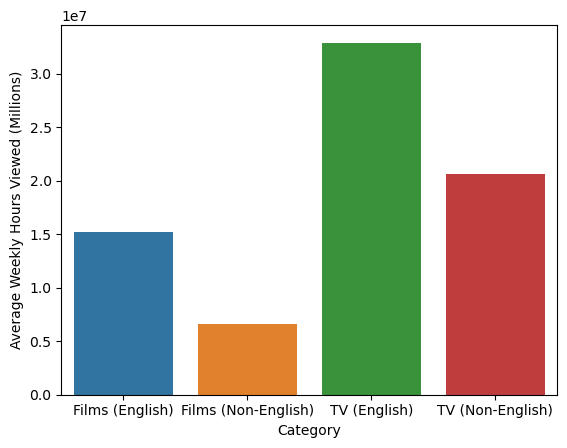

In [4]:
categories=df['category'].unique()
avg_weekly_hours_viewed_by_category=[]
for category in categories:
    avg_hours=df.loc[df['category']==category]['weekly_hours_viewed'].mean()
    avg_weekly_hours_viewed_by_category.append(avg_hours)
    
ax=sns.barplot(x=categories,y=avg_weekly_hours_viewed_by_category)
ax.set(xlabel='Category', ylabel='Average Weekly Hours Viewed (Millions)')
plt.show()

In [5]:
avg_weekly_hours_viewed_by_category[2]/np.sum(avg_weekly_hours_viewed_by_category)

0.436847771262779

On average, English TV Shows represent 43.68% of the weekly hours viewed. 

In [6]:
df.loc[df['category']=='TV (English)'].groupby(['show_title']).sum().sort_values(by='weekly_hours_viewed',ascending=False)

,weekly_hours_viewed
show_title,
Stranger Things,2967980000
Wednesday,1806850000
Manifest,1320520000
You,1245390000
The Witcher,1117900000
...,...
85 South: Ghetto Legends,2700000
Shane Gillis: Beautiful Dogs,2600000
Kountry Wayne: A Woman's Prayer,2600000


In [7]:
df.loc[df['category']=='TV (Non-English)'].groupby(['show_title']).sum().sort_values(by='weekly_hours_viewed',ascending=False)

,weekly_hours_viewed
show_title,
Squid Game,2289500000
Money Heist,1170200000
Café con aroma de mujer,813480000
Extraordinary Attorney Woo,662090000
All of Us Are Dead,659510000
...,...
Reporting for Duty,4400000
The Last Hours of Mario Biondo,3300000
The Playing Card Killer,3300000


In [8]:
df_tv_english=df.loc[df['category']=='TV (English)']
df_tv_english

,week,category,show_title,weekly_hours_viewed
20,2023-11-19,TV (English),The Crown,36900000
21,2023-11-19,TV (English),Matt Rife: Natural Selection,7900000
22,2023-11-19,TV (English),All the Light We Cannot See,21700000
23,2023-11-19,TV (English),How to Become a Mob Boss,11900000
24,2023-11-19,TV (English),Escaping Twin Flames,9400000
...,...,...,...,...
4985,2021-07-04,TV (English),Lucifer,16890000
4986,2021-07-04,TV (English),Pokémon Journeys: The Series,15350000
4987,2021-07-04,TV (English),Sophie: A Murder in West Cork,12800000
4988,2021-07-04,TV (English),CoComelon,11430000


In [28]:
def get_link_by_title(show_title):
    link='Not Found'
    url = 'http://www.google.com/search?q={} netflix'.format(show_title)
    r = requests.get(url)
    soup = BeautifulSoup(r.text)

    for i in soup.find_all('a'):
        link_location=str(i).find('https://www.netflix.com')
        if link_location!=-1:
            link=str(i)[link_location::].split('&')[0]
            break
    return link

In [46]:
show_titles=set(df_tv_english['show_title'].values)
links=[]
for show_title in show_titles:
    link=get_link_by_title(show_title)
    links.append(link)
    
show_links=dict(zip(show_titles,links))

KeyboardInterrupt: 

In [49]:
show_links

{'Spy Ops': 'https://www.netflix.com/title/81474104',
 'The Midnight Club': 'https://www.netflix.com/title/81112336',
 'Wild Croc Territory': 'https://www.netflix.com/title/81459086',
 'The Witcher': 'https://www.netflix.com/br/title/80189685',
 'Turning Point: 9/11 and the War on Terror': 'https://www.netflix.com/title/81315804',
 'Glamorous': 'https://www.netflix.com/br/title/81076871',
 'Lucifer': 'https://www.netflix.com/br/title/80057918',
 'Love Is Blind': 'https://www.netflix.com/pt/title/80996601',
 'Survival of the Thickest': 'https://www.netflix.com/title/81354524',
 'Sex/Life': 'https://www.netflix.com/br/title/80991848',
 'Bullsh*t The Gameshow': 'https://www.netflix.com/title/81326202',
 'Bake Squad': 'https://www.netflix.com/pt/title/81218438',
 'Get Gotti': 'https://www.netflix.com/title/81628150',
 'The Recruit': 'https://www.netflix.com/title/81396545',
 'Sophie: A Murder in West Cork': 'https://www.netflix.com/title/81094755',
 'Kaleidoscope': 'https://www.netflix.com

In [52]:
r=requests.get('https://www.netflix.com/pt/title/80996601')
soup=BeautifulSoup(r.text)

In [53]:
soup

<!DOCTYPE html>
<html class="" lang="pt"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="Aob+++752GiUzm1RNSIkM9TINnQDxTlxz02v8hFJK/uGO2hmXnJqH8c/ZpI05b2nLsHDhGO3Ce2zXJUFQmO7jA4AAAB1eyJvcmlnaW4iOiJodHRwczovL25ldGZsaXguY29tOjQ0MyIsImZlYXR1cmUiOiJFbmNyeXB0ZWRNZWRpYUhkY3BQb2xpY3lDaGVjayIsImV4cGlyeSI6MTU0MzI0MzQyNCwiaXNTdWJkb21haW4iOnRydWV9" data-expires="2018-11-26" data-feature="EME Extension - Policy Check" http-equiv="origin-trial"/><title>Casamento às Cegas | Site oficial da Netflix</title><link as="script" href="https://assets.nflxext.com/web/ffe/wp/signup/nmContent/nmTitle/nmTitleClient.js.a0fd4988ace1ff691048.js" rel="preload"/><script type="application/ld+json">{"@context":"http://schema.org","@type":"TVSeries","url":"https://www.netflix.com/br/title/80996601","contentRating":"14","name":"Casamento às Cegas","description":"Nick e Vanessa Lachey apresentam uma inusit